# Praca domowa 2

## Konstanty Kraszewski

Kodowanie zmiennych kategorycznych i uzupełnianie braków w [zbiorze danych Allegro](https://www.dropbox.com/s/360xhh2d9lnaek3/allegro-api-transactions.csv?dl=1).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('allegro-api-transactions.csv')
df

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,180.00,0,0,0,176,Kraśnik,RTV i AGD
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,14.99,1,2,0,34851,Dzierżoniów,Uroda
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,5.99,1,470,0,983,Supraśl,"Odzież, Obuwie, Dodatki"
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,200.00,0,0,0,163,Poznań,Dla Dzieci


## Kodowanie zmiennych kategorycznych
### TargetEncoder

In [3]:
from category_encoders import TargetEncoder
te = TargetEncoder()
df['it_location_targetencoding'] = te.fit_transform(df['it_location'], df['price'])
df[['it_location', 'it_location_targetencoding']]

,it_location,it_location_targetencoding
0,Warszawa,85.423398
1,Warszawa,85.423398
2,Leszno,61.990914
3,Wola Krzysztoporska,35.433365
4,BIAŁYSTOK,117.191956
...,...,...
420015,Kraśnik,24.306929
420016,Dzierżoniów,66.785334
420017,Supraśl,18.682800
420018,Poznań,106.203076


`Target encoding` w przeciwieństwie do `one-hot encoding` nie zwiększa liczby kolumn w zbiorze danych.

### OneHotEncoder

In [4]:
from category_encoders import OneHotEncoder
ohe = OneHotEncoder()
mc_onehotencoder = ohe.fit_transform(df['main_category'])

pd.concat([df['main_category'], mc_onehotencoder], axis=1)

,main_category,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5,main_category_6,main_category_7,main_category_8,main_category_9,...,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25,main_category_26,main_category_27
0,Komputery,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Odzież, Obuwie, Dodatki",0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Dom i Ogród,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Książki i Komiksy,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Odzież, Obuwie, Dodatki",0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,RTV i AGD,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420016,Uroda,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
420017,"Odzież, Obuwie, Dodatki",0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420018,Dla Dzieci,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Powstaje aż 27 nowych kolumn.

### HashingEncoder

In [5]:
from category_encoders import HashingEncoder
he = HashingEncoder(n_components=8)
mc_hashingencoder = he.fit_transform(df['main_category'])
pd.concat([df['main_category'], mc_hashingencoder], axis=1)

,main_category,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,Komputery,0,0,0,0,0,0,1,0
1,"Odzież, Obuwie, Dodatki",0,0,1,0,0,0,0,0
2,Dom i Ogród,0,0,0,0,0,0,1,0
3,Książki i Komiksy,0,0,1,0,0,0,0,0
4,"Odzież, Obuwie, Dodatki",0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
420015,RTV i AGD,0,0,0,1,0,0,0,0
420016,Uroda,0,0,0,0,1,0,0,0
420017,"Odzież, Obuwie, Dodatki",0,0,1,0,0,0,0,0
420018,Dla Dzieci,0,0,0,0,0,1,0,0


Kontrolujemy liczbę nowych kolumn poprzez parametr `n_components`, jednak przy małej liczbie różne kategorie mogą być tak samo kodowane. Wykonywanie trwa dość długo.

### MEstimateEncoder

In [6]:
from category_encoders import MEstimateEncoder
mee = MEstimateEncoder(m=1)
mc_mestimateencoder = mee.fit_transform(df['main_category'], df['price'])
pd.concat([df['main_category'], mc_mestimateencoder], axis=1)

,main_category,main_category
0,Komputery,121.806959
1,"Odzież, Obuwie, Dodatki",75.858066
2,Dom i Ogród,72.434802
3,Książki i Komiksy,25.031971
4,"Odzież, Obuwie, Dodatki",75.858066
...,...,...
420015,RTV i AGD,107.532762
420016,Uroda,28.130309
420017,"Odzież, Obuwie, Dodatki",75.858066
420018,Dla Dzieci,71.206519


Uproszczony `target encoder`, również pozwala uzyskać wynik kodowania w postaci jednej kolumny.

## Uzupełnianie braków

###  Ograniczenie ilości danych

In [25]:
df = df[['price', 'it_seller_rating','it_quantity']].head(30000)
df

,price,it_seller_rating,it_quantity
0,59.99,50177,997
1,4.90,12428,9288
2,109.90,7389,895
3,18.50,15006,971
4,19.90,32975,950
...,...,...,...
29995,79.99,38859,0
29996,1200.00,102,0
29997,15.00,3120,93
29998,19.85,26279,998


### Utworzenie braków danych

In [26]:
df_copy = df.copy(deep=True)

n = len(df_copy['price'])
rows = random.sample(range(n), n//10)

df_copy.loc[rows, 'it_seller_rating'] = np.nan
df_copy

,price,it_seller_rating,it_quantity
0,59.99,50177.0,997
1,4.90,NaN,9288
2,109.90,7389.0,895
3,18.50,15006.0,971
4,19.90,32975.0,950
...,...,...,...
29995,79.99,38859.0,0
29996,1200.00,NaN,0
29997,15.00,3120.0,93
29998,19.85,26279.0,998


### KNNImputer

In [32]:
from sklearn.impute import KNNImputer
knni = KNNImputer(n_neighbors=1)
df_copy = pd.DataFrame(knni.fit_transform(df_copy))

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df['it_seller_rating'], df_copy[1], squared=False)

12724.34336553888

In [36]:
rmses = []
for _ in range(10):
    df_copy = df.copy(deep=True)

    n = len(df['price'])
    rows = random.sample(range(n), n//10)

    df_copy.loc[rows, 'it_seller_rating'] = np.nan
    
    knni = KNNImputer(n_neighbors=2)
    df_copy = pd.DataFrame(knni.fit_transform(df_copy))
    rmses.append(mean_squared_error(df['it_seller_rating'], df_copy[1], squared=False))

rmses

[11370.771035359696,
 11110.97210952309,
 11305.737061512546,
 11160.82980926075,
 11216.81999337862,
 11567.603083304826,
 11143.895175301886,
 11538.298097571987,
 11715.183984072053,
 11952.524786835136]

In [37]:
np.std(rmses)

264.7230281357044

### Usuwanie danych z dwóch kolumn

In [38]:
rmses_it_seller_rating = []
rmses_it_quantity = []
for _ in range(10):
    df_copy = df.copy(deep=True)

    n = len(df['price'])
    rows_it_seller_rating = random.sample(range(n), n//10)
    rows_it_quantity = random.sample(range(n), n//10)

    df_copy.loc[rows_it_seller_rating, 'it_seller_rating'] = np.nan
    df_copy.loc[rows_it_quantity, 'it_quantity'] = np.nan
    
    knni = KNNImputer(n_neighbors=2)
    df_copy = pd.DataFrame(knni.fit_transform(df_copy))
    rmses_it_seller_rating.append(mean_squared_error(df['it_seller_rating'], df_copy[1], squared=False))
    rmses_it_quantity.append(mean_squared_error(df['it_quantity'], df_copy[2], squared=False))

print('it_seller_rating:', rmses_it_seller_rating)
print('it_quantity:', rmses_it_quantity)

it_seller_rating: [13052.67616354369, 13254.51811717832, 12339.764768408608, 12685.456602803399, 12736.416765270298, 12966.249915679487, 12766.936384434599, 13501.41774260886, 12381.653544599432, 12750.200678048823]
it_quantity: [8650.145749532201, 8233.1438876511, 8012.025625637689, 9049.20032090129, 8568.23906683427, 8579.632727800765, 8837.067032232753, 8650.984161533299, 9049.683796210322, 8548.324497616477]


In [39]:
print('it_seller_rating std:', np.std(rmses_it_seller_rating))
print('it_quantity std:', np.std(rmses_it_quantity))

it_seller_rating std: 343.3185789624573
it_quantity std: 307.65534083511926


## Wniosek

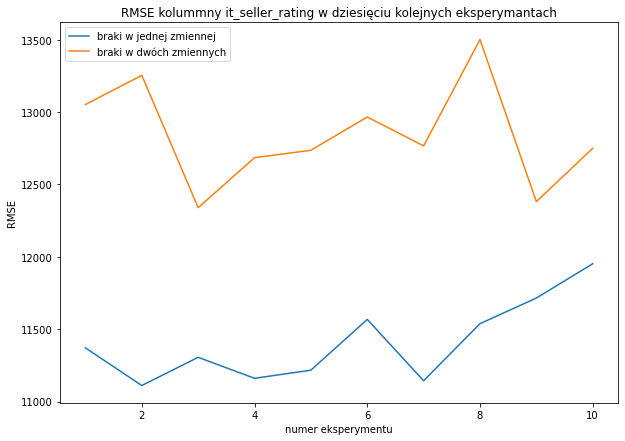

In [52]:
plt.figure(figsize=(10,7))
plt.plot(range(1,11), rmses)
plt.plot(range(1,11), rmses_it_seller_rating)
plt.title('RMSE kolummny it_seller_rating w dziesięciu kolejnych eksperymantach')
plt.xlabel('numer eksperymentu')
plt.ylabel('RMSE')
plt.legend(['braki w jednej zmiennej', 'braki w dwóch zmiennych'])
plt.show()

Jak widać przy większej ilości brakujących danych błąd jest większy, ale i tak w obydwu przypadkach jest on bardzo duży.